In [1]:
from pint import UnitRegistry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pops = [2749, 2845, 4247, 1843, 2562, 1774, 1201, 1284, 1287, 2339, 1177, 962, 1176, 2149, 1404, 969, 1237, 1615, 1201]
years = range(1997, 2016)
pop_df = pd.DataFrame({'year':years, 'pop':pops})
pop_df.head()

,year,pop
0,1997,2749
1,1998,2845
2,1999,4247
3,2000,1843
4,2001,2562


In [13]:
abs_diffs = np.ediff1d(pop_df['pop'], to_end=0)
rel_diffs = abs_diffs / pop_df['pop']
rates = rel_diffs[:-1]

In [16]:
np.random.choice(rates)

-0.2563467492260062

In [21]:
t_0 = 2015
p_0 = pop_df[pop_df['year']==t_0]['pop'].values[0]

In [24]:
class RandomGrowth():

    def __init__(self, t_0, p_0, rates):
        self.t_0 = t_0
        self.p_0 = p_0
        self.rates = rates
        self.data = {'year':[t_0], 'pop':[p_0]}
    
    def simulation(self, years):
        for year in range(t_0+1,t_0+years+1):
            rate = np.random.choice(rates)*self.data['pop'][-1]
            self.data['year'].append(year)
            self.data['pop'].append(self.data['pop'][-1]+rate)

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


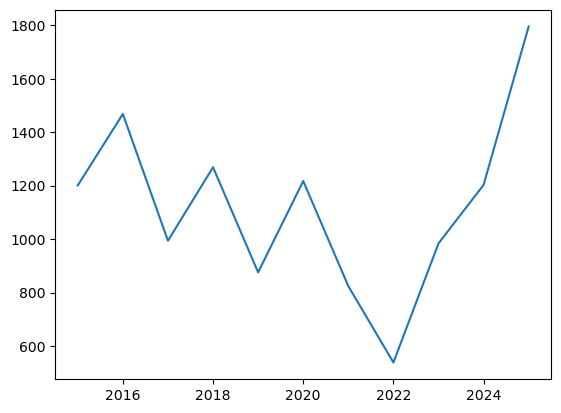

In [27]:
t_0 = 2015
p_0 = pop_df[pop_df['year']==t_0]['pop'].values[0]
model1 = RandomGrowth(t_0, p_0, rates)
model1.simulation(10)

sns.lineplot(x=model1.data['year'], y=model1.data['pop']);